In [20]:
%matplotlib inline
import pandas as pd

In [21]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [22]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [131]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [34]:
c=cast[(cast.character=='Superman') | (cast.character=='Batman')]
c=c.groupby(['year','character']).size()
c = c.unstack()
c = c.fillna(0)
t=c.Superman - c.Batman
len(t[t>0])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [35]:
c=cast[(cast.character=='Superman') | (cast.character=='Batman')]
c=c.groupby(['year','character']).size()
c = c.unstack()
c = c.fillna(0)
t=c.Batman - c.Superman
len(t[t>0])

26

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

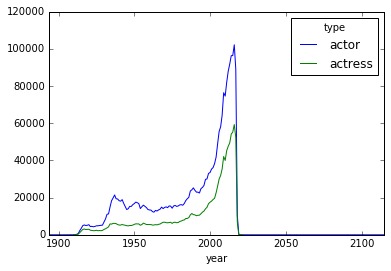

In [55]:
c=cast.groupby(['year','type']).size()
#c=c.head(5)
c=c.unstack('type')
#c = c.fillna(0)
c.head(5)
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

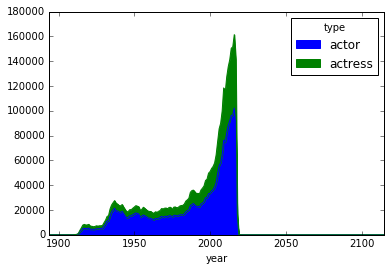

In [136]:
c=cast.groupby(['year','type']).size()
#c=c.head(5)
c=c.unstack('type')
#c = c.fillna(0)
c.head(5)
c.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

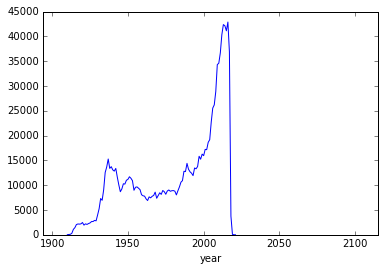

In [62]:
c=cast.groupby(['year','type']).size()
#c=c.head(5)
c=c.unstack('type')
#c = c.fillna(0)
c.head(5)
(c.actor-c.actress).plot()
#t.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [80]:
c=cast
c=c.groupby(['year','type']).size()
c.head()

year  type   
1894  actor       2
      actress     1
1900  actor       2
1905  actor       1
1906  actor      14
dtype: int64

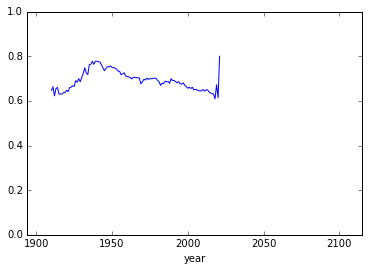

In [82]:
c=c.unstack('type')
#(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [99]:
c=cast
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [100]:
c=c[c.n==2]
c=c.groupby(['year','type']).size()
#c=c.unstack('type')
#c.head()

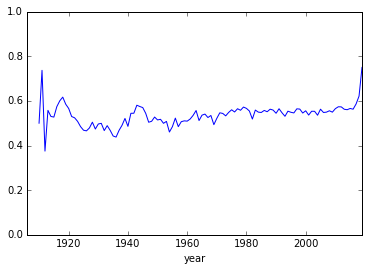

In [104]:
c=c.unstack('type')
(c.actor/(c.actor+c.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

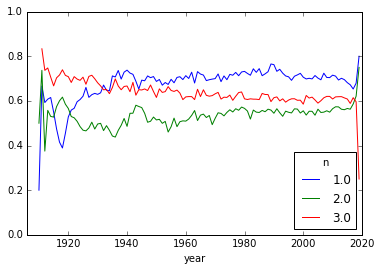

In [138]:
c=cast
c=c[c.n<=3]
c=c.groupby(['year','type','n']).size()
c=c.unstack('type')
r=c.actor/(c.actor+c.actress)
c.head()
r=r.unstack('n')
r.plot(ylim=[0,1])

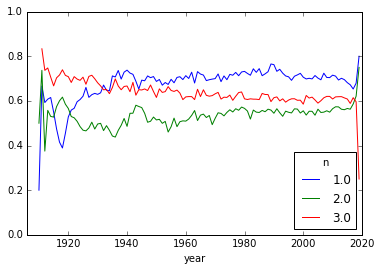

In [133]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])